multi variable linear regression:

salary = m1 * experience + m2 * test_score + m3 * interview_score + b

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

df = pd.read_csv("database/hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


cleaning data

In [200]:
median_test_score = math.floor(df['test_score(out of 10)'].mean())
median_test_score

7

In [201]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(median_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


change text data to numeric data

In [202]:
import word2number.w2n as w2n
list_experience = df['experience'].tolist()
list_experience

[nan, nan, 'five', 'two', 'seven', 'three', 'ten', 'eleven']

In [203]:

for i in range(len(list_experience)):
    if type(list_experience[i]) == str:
        list_experience[i] = w2n.word_to_num(list_experience[i])
list_experience

[nan, nan, 5, 2, 7, 3, 10, 11]

In [204]:
df['experience'] = list_experience
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,7.0,7,72000
7,11.0,7.0,8,80000


In [205]:
df['experience'] = df['experience'].fillna(0)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,7.0,7,72000
7,11.0,7.0,8,80000


In [206]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df['salary($)'])
predict1 = reg.predict([[2, 9, 6]])
predict2 = reg.predict([[12, 10, 10]])
print(predict1, predict2)

[53713.86677124] [93747.79628651]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


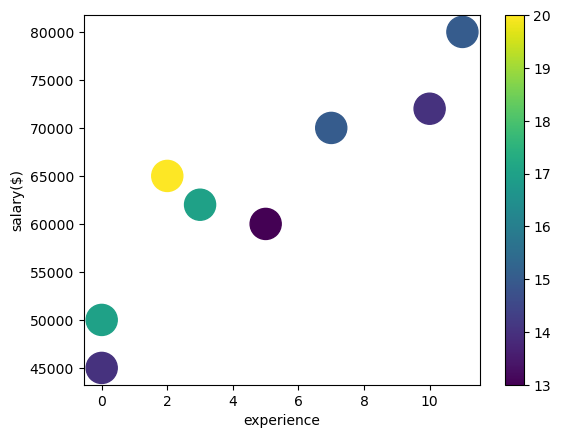

In [207]:
%matplotlib inline
x = df['experience']
y = df['salary($)']
color = df['test_score(out of 10)'] + df['interview_score(out of 10)']
fig , ax = plt.subplots()
scat = ax.scatter(x, y, s = 500, c=color)
fig.colorbar(scat)
ax.set_xlabel('experience')
ax.set_ylabel('salary($)')
plt.show()